# Mattia's part

In [46]:
store.close()

In [1]:
# to show pictures direcly in the code  
%matplotlib inline 

# required packages
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import Expando_class
from Expando_class import Expando
import seaborn as sns
import numpy as np
import pylab
import datetime as dt

In [6]:
# Read profiles for DK, DK-E and DK-W
profilesdk = pd.read_excel('input/rawinputdata.xlsx', 
                         sheetname='profileDK',
                         encoding='UTF8',
                         thousands=',',
                         decimals='.',
                         index_col=[0])

profilesdke = pd.read_excel('input/rawinputdata.xlsx', 
                         sheetname='profileDKE',
                         encoding='UTF8',
                         thousands=',',
                         decimals='.',
                         index_col=[0])

profilesdkw = pd.read_excel('input/rawinputdata.xlsx', 
                         sheetname='profileDKW',
                         encoding='UTF8',
                         thousands=',',
                         decimals='.',
                         index_col=[0])

# Electricity demaand for 2012, NET electricity demand, Energinet.dk
demandel = pd.read_excel('input/el_demand.xlsx', 
                            sheetname='Sheet1',
                            encoding='UTF8',
                            thousands=',',
                            decimals='.',
                            header = 0,
                            index_col=[0])

# Fit headings to other VMAS data or change headings
translation = pd.read_excel('input/translation.xlsx', 
                            sheetname='Sheet1',
                            encoding='UTF8',
                            thousands=',',
                            decimals='.',
                            header = 0)

MatchingIndustry = pd.read_excel('input/MatchingIndustry.xlsx', 
                            sheetname='Sheet1',
                            encoding='UTF8',
                            thousands=',',
                            decimals='.',
                            header = 0)

# Match the names of the Industry Sectors and the End Use to the names used by VMAS directly
# If we take the Matrixes from VMAS directly as input data this will not be necessary any more
# Fit headings to other VMAS data or change headings

# End Use
MatchingEndUse = pd.read_excel('input/MatchingEndUse.xlsx', 
                            sheetname='Sheet1',
                            encoding='UTF8',
                            thousands=',',
                            decimals='.',
                            header = 0)

# End Use
MatchingFuel = pd.read_excel('input/MatchingFuel.xlsx', 
                            sheetname='Sheet1',
                            encoding='UTF8',
                            thousands=',',
                            decimals='.',
                            header = 0)

vmas = pd.read_excel('input/VMAS_summarized.xlsx', 
                     sheetname='Sheet1',
                     encoding='UTF8',
                     thousands=',',
                     decimals='.',
                     header = 0)


In [7]:
# Small adjustments
MatchingIndustry = MatchingIndustry[:57]

translation.rename(columns={'Industry with numbers': 'Industrywithnumbers'}, inplace=True)

In [6]:
# Implement a storage where we load the data only once
store = pd.HDFStore('store.h5')

store['profilesdk'] = profilesdk
store['profilesdke'] = profilesdke
store['profilesdkw'] = profilesdkw
store['demandel'] = demandel
store['translation'] = translation
store['MatchingIndustry'] = MatchingIndustry
store['MatchingEndUse'] = MatchingEndUse
store['MatchingFuel'] = MatchingFuel
store['vmas'] = vmas
#store['profiles_mine'] = profiles_mine

store.close()


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->axis1] [items->None]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->axis1] [items->None]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->axis1] [items->None]

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2881: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block1_values] [items->['Branche m. numr

In [5]:
# open the data from the storage
store = pd.HDFStore('store.h5')

mystore = Expando()
profilesdk = store['profilesdk']
profilesdke = store['profilesdke']
profilesdkw = store['profilesdkw']
demandel = store['demandel']
translation = store['translation']
MatchingIndustry = store['MatchingIndustry']
MatchingEndUse = store['MatchingEndUse']
MatchingFuel = store['MatchingFuel']
vmas = store['vmas']
#profiles_mine = store['profiles_mine'] 
#profiles_MWh = store ['profiles_MWh']
#MWh_cumulated = store['MWh_cumulated']
store.close()

In [8]:
# Match 57 sectors with helge's profiles and use names from VM in english

#helgematch = {'Gardening':translation["Industrywithnumbers"][0:5],
#             'Manufacturing industries: Food, beverages and tobacco': translation["Industrywithnumbers"][6:15],
#             'Manufacturing industries: Textile and leather': translation["Industrywithnumbers"][[15,16,5,34,35,36]],
#             'Manufacturing industries: Wood and woodproducts': translation["Industrywithnumbers"][17],
#             'Manufacturing industries: Printing and paper': translation["Industrywithnumbers"][[18,19]],
#             'Manufacturing industries: Chemical': translation["Industrywithnumbers"][[20,21,22,32]],
#             'Manufacturing industries: Non metallic mineral products': translation["Industrywithnumbers"][30],
#             'Manufacturing industries: Foundry and Fabricated metal products, machinery': translation["Industrywithnumbers"][[23,24,25,33,37,38,39,40,41,42,43]],
#             'Manufacturing industries: Other 1': translation["Industrywithnumbers"][[44,45]],
#             'Construction': translation["Industrywithnumbers"][[26,27,28,29,31]],
#             'Retail and wholesale trade: Retail trade': translation["Industrywithnumbers"][47],
#             'Retail and wholesale trade: Wholesale trade': translation["Industrywithnumbers"][46],
#             'Service- and entertainments business: Restaurants and hotels': translation["Industrywithnumbers"][[48,49]],
#             'Service- and entertainments business: Banking, insurance and business services': translation["Industrywithnumbers"][[51,52]],
#             'Service- and entertainments business: Cultural activities and household services': translation["Industrywithnumbers"][[54,55,56]],
#             'Public services: Education and research': translation["Industrywithnumbers"][53],
#             'Public services: Postal service and telecommunication': translation["Industrywithnumbers"][50]}

helgematchnew = {'Gardening':MatchingIndustry["Industry_VM_en"][0:5],
             'Manufacturing industries: Food, beverages and tobacco': MatchingIndustry["Industry_VM_en"][6:15],
             'Manufacturing industries: Textile and leather': MatchingIndustry["Industry_VM_en"][[15,16,5,34,35,36]],
             'Manufacturing industries: Wood and woodproducts': MatchingIndustry["Industry_VM_en"][[17]],
             'Manufacturing industries: Printing and paper': MatchingIndustry["Industry_VM_en"][[18,19]],
             'Manufacturing industries: Chemical': MatchingIndustry["Industry_VM_en"][[20,21,22,32]],
             'Manufacturing industries: Non metallic mineral products': MatchingIndustry["Industry_VM_en"][[30]],
             'Manufacturing industries: Foundry and Fabricated metal products, machinery': MatchingIndustry["Industry_VM_en"][[23,24,25,33,37,38,39,40,41,42,43]],
             'Manufacturing industries: Other 1': MatchingIndustry["Industry_VM_en"][[44,45]],
             'Construction': MatchingIndustry["Industry_VM_en"][[26,27,28,29,31]],
             'Retail and wholesale trade: Retail trade': MatchingIndustry["Industry_VM_en"][[47]],
             'Retail and wholesale trade: Wholesale trade': MatchingIndustry["Industry_VM_en"][[46]],
             'Service- and entertainments business: Restaurants and hotels': MatchingIndustry["Industry_VM_en"][[48,49]],
             'Service- and entertainments business: Banking, insurance and business services': MatchingIndustry["Industry_VM_en"][[51,52]],
             'Service- and entertainments business: Cultural activities and household services': MatchingIndustry["Industry_VM_en"][[54,55,56]],
             'Public services: Education and research': MatchingIndustry["Industry_VM_en"][[53]],
             'Public services: Postal service and telecommunication': MatchingIndustry["Industry_VM_en"][[50]]}


In [9]:
# Match 57 sectors with 5 main sectors
#mean_helge = {'Agriculture': translation["Industrywithnumbers"][0:5],
#             'Prodsingle': translation["Industrywithnumbers"][[5,15,16,34,35,36]],
#             'Proddouble': translation["Industrywithnumbers"][[6,7,8,9,10,12,14,17,19,23,24,25,29,33,37,38,39,40,41,42,43]],
#             'Prodtriple': translation["Industrywithnumbers"][[8,11,13,18,20,21,22,26,27,28,30,31,32]],
#             'Service': translation["Industrywithnumbers"][44:57]}

mean_helge_new = {'Agriculture': MatchingIndustry["Industry_VM_en"][0:5],
             'Production_single': MatchingIndustry["Industry_VM_en"][[5,15,16,34,35,36]],
             'Production_double': MatchingIndustry["Industry_VM_en"][[6,7,8,9,10,12,14,17,19,23,24,25,29,33,37,38,39,40,41,42,43]],
             'Production_triple': MatchingIndustry["Industry_VM_en"][[8,11,13,18,20,21,22,26,27,28,30,31,32]],
             'Service': MatchingIndustry["Industry_VM_en"][44:57]}

In [10]:
# Two loop: associate 57 VM sectors with their corresponding profiles in Helge 
#and create a dataset that gathers all of them

# Solution 1
data_profiles = pd.DataFrame()
for x in helgematchnew.keys():
    for value in helgematchnew.get(x):
        if type(value) is list:
            for item in value.values:
                data_profiles[item] = profilesdk[x]
        else:
            data_profiles[value] = profilesdk[x]
# data_profiles is one dataset

# Solution 2
def map_keys(value):
    string = "Not Specified"
    for key in helgematchnew.keys():
        try:
            value_list = helgematchnew.get(key).values
        except AttributeError as e:
            value_string = helgematchnew.get(key)
            if value is value_string:
                string = key
                break
        # -- 
        if value in value_list:
            string = key
            break
        else:
            continue
    # -- 
    return(string)
MatchingIndustry["Mapping"] = MatchingIndustry.Industry_VM_en.apply(map_keys)
# --
map_profile = pd.DataFrame()
for row in MatchingIndustry.itertuples():
    map_profile[row.Mapping] = profilesdk[row.Mapping]
# map_profile is another dataset


In [11]:
# Refining the dataset (THIS PROFILES ARE IN % VALUES)
all_profiles = data_profiles[1:]


In [12]:
# Bring the dataset to MWh values
# Use column names that can be used in the programming - no empty spaces
vmas.columns = ['Industry_TIMES_en','EndUse_TIMES_en','Fuel_TIMES_en','TJ_per_year','Group','Industry_aggregated',
                    'EndUse_aggregated','Fuel_aggregated']

# Divide to get TJ instead of GJ
vmas_TJ = vmas
vmas_TJ.TJ_per_year = vmas_TJ.TJ_per_year/1000

In [13]:
# Get rid of some columns as we use our own / the Viegand Magoee aggregation
vmas_TJ = vmas_TJ[['Industry_TIMES_en','EndUse_TIMES_en','Fuel_TIMES_en','TJ_per_year','Fuel_aggregated']]

# Add the single, double, triple information to the production
idx_prod = MatchingIndustry[MatchingIndustry['Industry_VM_en_agg'] == 'Production'].index

MatchingIndustry.loc[idx_prod,'Industry_VM_en_agg'] = (MatchingIndustry.loc[idx_prod,'Industry_VM_en_agg'] + 
                                                       '_' + MatchingIndustry.loc[idx_prod,'Shift'])

In [14]:
# Make dictionaries: TIMES-VMAS and VMAS-aggregated
# Industry branch
dict_industry = MatchingIndustry[['Industry_TIMES_en','Industry_VM_en']].set_index(
    'Industry_TIMES_en')['Industry_VM_en'].to_dict()
dict_industry_agg = MatchingIndustry[['Industry_VM_en','Industry_VM_en_agg']].set_index(
    'Industry_VM_en')['Industry_VM_en_agg'].to_dict()

# End-use
dict_enduse = MatchingEndUse[['EndUse_TIMES_en','EndUse_VM_en']].set_index(
    'EndUse_TIMES_en')['EndUse_VM_en'].to_dict()
dict_enduse_agg = MatchingEndUse[['EndUse_VM_en','EndUse_VM_en_agg']].set_index(
    'EndUse_VM_en')['EndUse_VM_en_agg'].to_dict()

# Fuel
dict_fuel = MatchingFuel[['Fuel_TIMES_en','Fuel_VM_en']].set_index(
    'Fuel_TIMES_en')['Fuel_VM_en'].to_dict()
dict_fuel_agg = MatchingFuel[['Fuel_VM_en','Fuel_VM_en_agg']].set_index(
    'Fuel_VM_en')['Fuel_VM_en_agg'].to_dict()

In [15]:
# make new column for Industry_VM_en
vmas_TJ.loc[:,'Industry_VM_en'] = vmas_TJ.loc[:,'Industry_TIMES_en']

# make new column for EndUse_VM_en
vmas_TJ.loc[:,'EndUse_VM_en'] = vmas_TJ.loc[:,'EndUse_TIMES_en']

# make new column for Fuel_VM_en
vmas_TJ.loc[:,'Fuel_VM_en'] = vmas_TJ.loc[:,'Fuel_TIMES_en']

# replace TIMES names by VMAS industry branches
vmas_TJ.Industry_VM_en.replace(dict_industry, inplace=True)
# replace TIMES names by VMAS end use
vmas_TJ.EndUse_VM_en.replace(dict_enduse, inplace=True)
# replace TIMES names by VMAS fuel
vmas_TJ.Fuel_VM_en.replace(dict_fuel, inplace=True)

# make new column for aggregated VMAS-industry branches
vmas_TJ.loc[:,'Industry_VM_en_agg'] = vmas_TJ.loc[:,'Industry_VM_en']
# make new column for aggregated VMAS-end use
vmas_TJ.loc[:,'EndUse_VM_en_agg'] = vmas_TJ.loc[:,'EndUse_VM_en']
# make new column for aggregated VMAS-fuel
vmas_TJ.loc[:,'Fuel_VM_en_agg'] = vmas_TJ.loc[:,'Fuel_VM_en']

# get aggregation columns
vmas_TJ.Industry_VM_en_agg.replace(dict_industry_agg, inplace=True)
vmas_TJ.EndUse_VM_en_agg.replace(dict_enduse_agg, inplace=True)
vmas_TJ.Fuel_VM_en_agg.replace(dict_fuel_agg, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:297: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [16]:
# Continue with a cleaned data frame
# just the required columns
vmas_TJ = vmas_TJ.loc[:,['Industry_VM_en_agg','Industry_VM_en','EndUse_VM_en_agg','EndUse_VM_en','TJ_per_year',
                        'Fuel_VM_en','Fuel_VM_en_agg']]

# and kicking out the TIMES added sectors 58,59,60 - the data from VMAS excludes these
idx_out = vmas_TJ[(vmas_TJ['Industry_VM_en'] != '58 Public service') & (
                   vmas_TJ['Industry_VM_en'] != '59 Construction') & (
                   vmas_TJ['Industry_VM_en'] != '60 Other utilities')].index

vmas_TJ = vmas_TJ.loc[idx_out]

# To get an impression of the values: sum of PJ per aggregated Industry
vmas_sum_PJ = pd.DataFrame(vmas_TJ.groupby(['Industry_VM_en_agg'])['TJ_per_year'].sum()/1000)
vmas_sum_PJ

TJ_per_year
Industry_VM_en_agg             
Agriculture           36.843600
Production_double     46.922777
Production_single      5.941703
Production_triple     40.096932
Service               69.060289

In [17]:
# Sum up the GJ Electricity of each Industry NOW IN MwH
# PJ to MWh: 1 MWh = 3.6*10^6 PJ so if we have PJ it will be MWh= PJ/3.6*10^6
industry_TJ = pd.DataFrame(vmas_TJ[vmas["Fuel_TIMES_en"] == '17 Electricity'].
                           groupby(['Industry_VM_en'])['TJ_per_year'].sum()/0.0036)
industry_TJ.columns = ['MWh_per_year']
industry_MWh = industry_TJ
industry_MWh.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()


MWh_per_year
Industry_VM_en                                              
Arts, entertainment and recreation activities   2.158281e+05
Extraction of gravel and stone                  9.343556e+04
Farming                                         1.514674e+06
Financial and insurance                         1.924269e+05
Fishing                                         6.466361e+04

In [18]:
# For multiplication, the values should be formatted as a series (example b = pd.Series([0,2,3], index=['col1','col2','col3']))
industry_MWh_mul = pd.Series(industry_MWh.MWh_per_year)
industry_MWh_mul.head()

Industry_VM_en
Arts, entertainment and recreation activities     2.158281e+05
Extraction of gravel and stone                    9.343556e+04
Farming                                           1.514674e+06
Financial and insurance                           1.924269e+05
Fishing                                           6.466361e+04
Name: MWh_per_year, dtype: float64

In [19]:
# Create hourly values of electricity consumption
profiles_mine = all_profiles.multiply(industry_MWh_mul,axis=1)

# Cumulated sum of MWh profiles
MWh_new_cumulated = pd.DataFrame(profiles_mine.cumsum(axis = 1))

In [20]:
# Creating dataframes
# Agriculture dataframe
agri_dataframe = pd.DataFrame()
for key in mean_helge_new:
    if key is "Agriculture":
        value_list = mean_helge_new.get(key).values
        agri_dataframe[mean_helge_new.get(key).values] = profiles_mine.loc[:, value_list]
agri_dataframe = agri_dataframe[1:]

# Production single dataframe
prodsing_dataframe = pd.DataFrame()
for key in mean_helge_new:
    if key is "Production_single":
        value_list = mean_helge_new.get(key).values
        prodsing_dataframe[mean_helge_new.get(key).values] = profiles_mine.loc[:, value_list]
prodsing_dataframe = prodsing_dataframe[1:]

# Production double dataframe
proddoub_dataframe = pd.DataFrame()
for key in mean_helge_new:
    if key is "Production_double":
        value_list = mean_helge_new.get(key).values
        proddoub_dataframe[mean_helge_new.get(key).values] = profiles_mine.loc[:, value_list]
proddoub_dataframe = proddoub_dataframe[1:]

# Production triple dataframe
prodtripl_dataframe = pd.DataFrame()
for key in mean_helge_new:
    if key is "Production_triple":
        value_list = mean_helge_new.get(key).values
        prodtripl_dataframe[mean_helge_new.get(key).values] = profiles_mine.loc[:, value_list]
prodtripl_dataframe = prodtripl_dataframe[1:]

# Service dataframe
serv_dataframe = pd.DataFrame()
for key in mean_helge_new:
    if key is "Service":
        value_list = mean_helge_new.get(key).values
        serv_dataframe[mean_helge_new.get(key).values] = profiles_mine.loc[:, value_list]
serv_dataframe = serv_dataframe[1:]

# Cumulative dataframe
cumulative_dataframe = pd.DataFrame()

agri_cum_dataframe = agri_dataframe.sum(axis=1)
prodsing_cum_dataframe = prodsing_dataframe.sum(axis=1)
proddoub_cum_dataframe = proddoub_dataframe.sum(axis=1)
prodtripl_cum_dataframe = prodtripl_dataframe.sum(axis=1)
serv_cum_dataframe = serv_dataframe.sum(axis=1)

cumulative_dataframe["Agriculture"] = agri_cum_dataframe
cumulative_dataframe["Production_single"] = prodsing_cum_dataframe
cumulative_dataframe["Production_double"] = proddoub_cum_dataframe
cumulative_dataframe["Production_triple"] = prodtripl_cum_dataframe
cumulative_dataframe["Service"] = serv_cum_dataframe

# total cumulative dataframe
new_cumulated = pd.DataFrame(cumulative_dataframe.cumsum(axis = 1))

# Mean dataframe MWh profiles
mean_profiles = pd.DataFrame()
for key in mean_helge_new:
    value_list = mean_helge_new.get(key).values
    mean_profiles[key] = profiles_mine.loc[:, value_list].mean(axis=1)
avg_prof = mean_profiles[1:]

# Mean dataframe % profiles
mean_profiles_perc = pd.DataFrame()
for key in mean_helge_new:
    value_list = mean_helge_new.get(key).values
    mean_profiles_perc[key] = all_profiles.loc[:, value_list].mean(axis=1)
avg_prof_perc = mean_profiles_perc[1:]

In [21]:
# Summary of dataframes

# TOTAL % profiles
all_profiles

# TOTAL MWH hourly profiles
profiles_mine

# Cumulated sum of MWh profiles
MWh_new_cumulated

# Sector's dataframes
# Agriculture dataframe
agri_dataframe
# Production single dataframe
prodsing_dataframe
# Production double dataframe
proddoub_dataframe
# Production triple dataframe
prodtripl_dataframe
# Service dataframe
serv_dataframe

# Cumulative sectors dataframe
cumulative_dataframe

# TOTAL cumulative dataframe
new_cumulated

# Mean dataframe in MWh
avg_prof.head(1)

# Mean dataframe absolute values




Agriculture  Production_single  Production_double  \
2012-01-01 01:00:00    42.292621           1.799148           9.461759   

                     Production_triple    Service  
2012-01-01 01:00:00            9.97581  34.704109

In [45]:
# Implement a storage where we load the data only once
store = pd.HDFStore('store.h5')

store['all_profiles'] = all_profiles
store['profiles_mine'] = profiles_mine
store['MWh_new_cumulated'] = MWh_new_cumulated
store['agri_dataframe'] = agri_dataframe
store['prodsing_dataframe'] = prodsing_dataframe
store['proddoub_dataframe'] = proddoub_dataframe
store['prodtripl_dataframe'] = prodtripl_dataframe
store['serv_dataframe'] = serv_dataframe
store['cumulative_dataframe'] = cumulative_dataframe
store['new_cumulated'] = new_cumulated
store['avg_prof'] = avg_prof
#store['profiles_mine'] = profiles_mine

store.close()

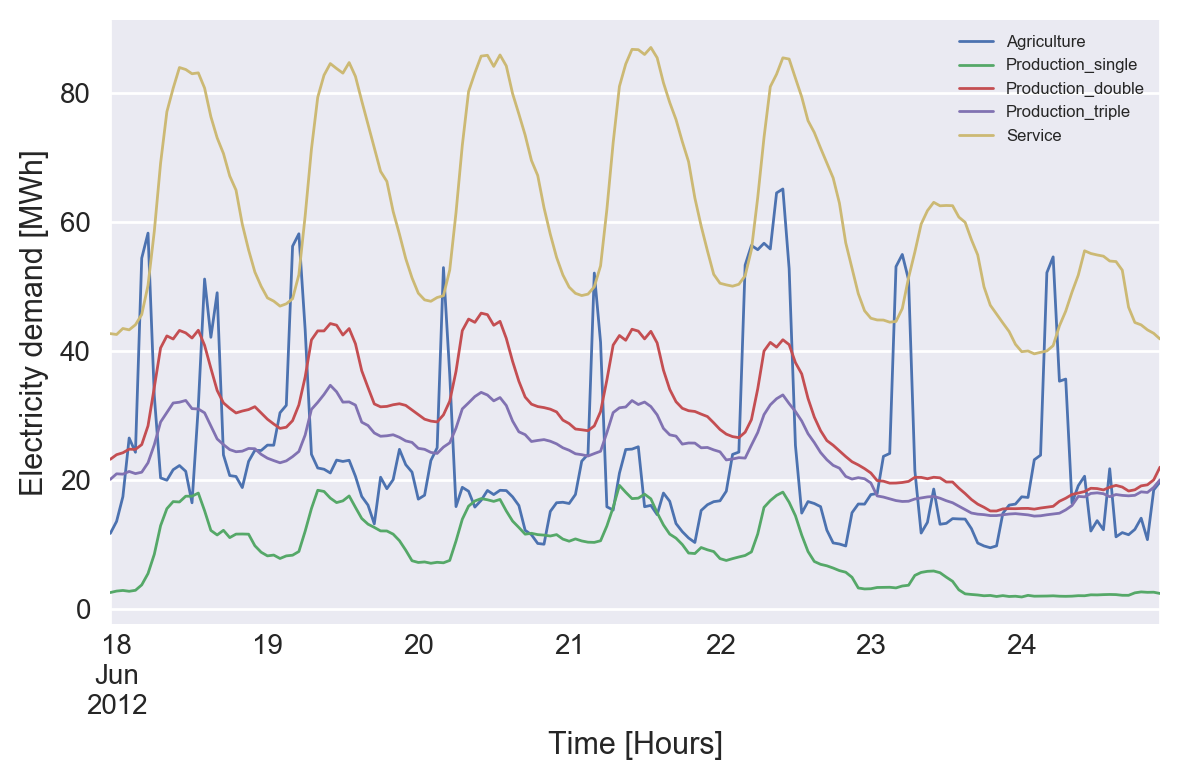

In [523]:
##### Plots

# Yearly development of average hourly profiles for the 5 sectors (ps each profile is the mean of all the sectors in THAT group)
fig = plt.figure(figsize=(6, 4), dpi=200)
avg_prof[4054:4222].plot(linewidth=1, ax = plt.gca())
#plt.xticks(rotation=70)
plt.legend(loc='best', prop={'size':6})
plt.xlabel('Time [Hours]')
plt.ylabel('Electricity demand [MWh]')
plt.tight_layout()
plt.show()

In [258]:
fig = plt.figure(10, figsize=(6, 4), dpi=200)
xax = new_cumulated[1033:1190].index
#plt.plot(new_cumulated[1033:1190], linewidth=0.5, label=(g for g in new_cumulated.columns.values))
ax1 = new_cumulated[1033:1190].plot(linewidth=0.5, ax = plt.gca())
ax2 = demandel.DK[1033:1190].plot(linewidth=2.0, label="Total electricity demand")
ax1.xaxis.grid(True, which='minor', linestyle='-', linewidth=0.5)
ax1.yaxis.grid(True, which='minor', linestyle='-', linewidth=0.5)


plt.tight_layout()
plt.legend(loc='best',prop={'size':6})

In [23]:
avg_prof_perc = avg_prof_perc*100

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\polynomial.py:587: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


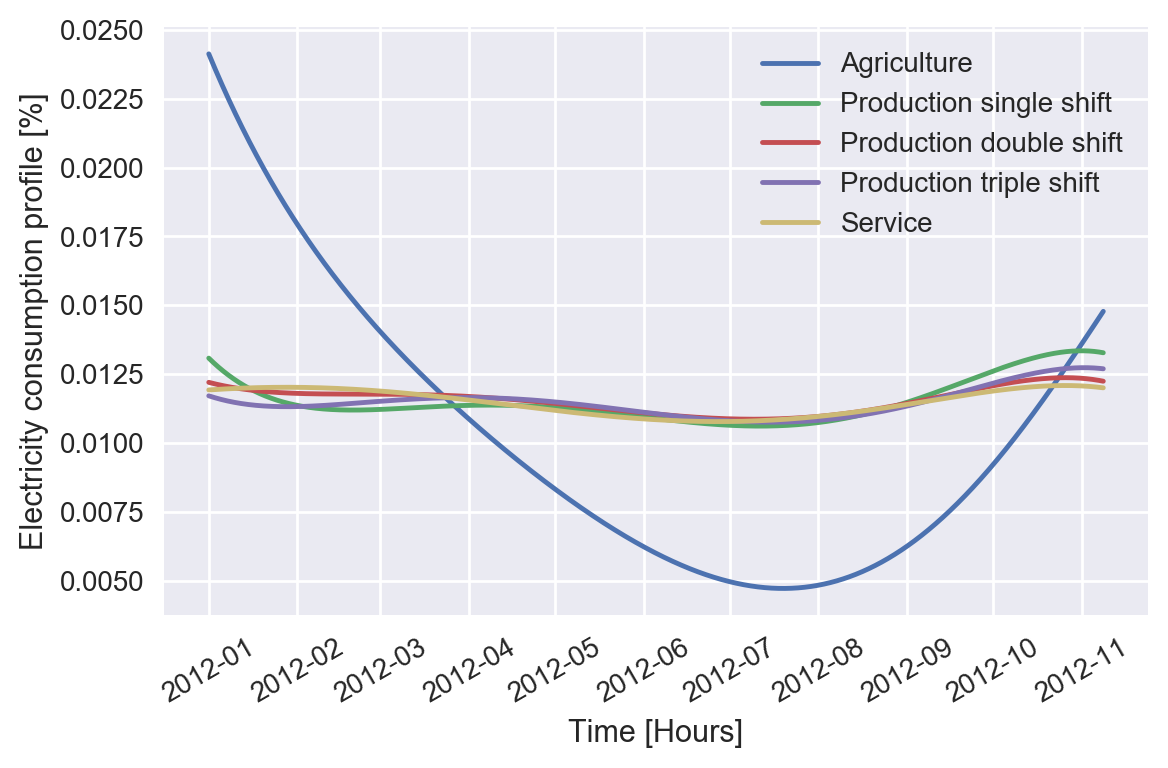

In [25]:
# Trendline of the 5 main sectors in %

# Define the index
microsecond_index = [ (item - dt.datetime(1970, 1, 1)) / dt.timedelta(microseconds=1) for item in avg_prof_perc.index]
millisecond_index = [ (item - dt.datetime(1970, 1, 1)) / dt.timedelta(milliseconds=1) for item in avg_prof_perc.index]
second_index = [item.timestamp() for item in avg_prof_perc.index]

# First solution (ALL IN ONE IMAGE)
x = millisecond_index

trend_agri = np.polyfit(x, avg_prof_perc.Agriculture, 18)
trend_single = np.polyfit(x, avg_prof_perc.Production_single, 18)
trend_double = np.polyfit(x, avg_prof_perc.Production_double, 18)
trend_triple = np.polyfit(x, avg_prof_perc.Production_triple, 18)
trend_serv = np.polyfit(x, avg_prof_perc.Service, 18)

p_agri = np.poly1d(trend_agri)
p_single = np.poly1d(trend_single)
p_double = np.poly1d(trend_double)
p_triple = np.poly1d(trend_triple)
p_serv = np.poly1d(trend_serv)

fig10 = plt.figure(10, figsize=(6, 4), dpi=200)
#xax = pd.to_datetime(x, unit='ms')
#xax = pd.to_datetime(x, unit='s')
#xax = pd.to_datetime(x, unit='us')
xax = avg_prof_perc.index[:7500]
pylab.plot(xax, p_agri(x[:7500]), label='Agriculture')
pylab.plot(xax, p_single(x[:7500]), label='Production single shift')
pylab.plot(xax, p_double(x[:7500]), label='Production double shift')
pylab.plot(xax, p_triple(x[:7500]), label='Production triple shift')
pylab.plot(xax, p_serv(x[:7500]), label='Service')

plt.xlabel('Time [Hours]')
plt.ylabel(u'Electricity consumption profile [%]')
plt.legend(loc='best',prop={'size':10})
plt.xticks(rotation=30)
plt.tight_layout()
plt.savefig('pics/trendlines.pdf', bbox_inches='tight')

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\polynomial.py:587: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


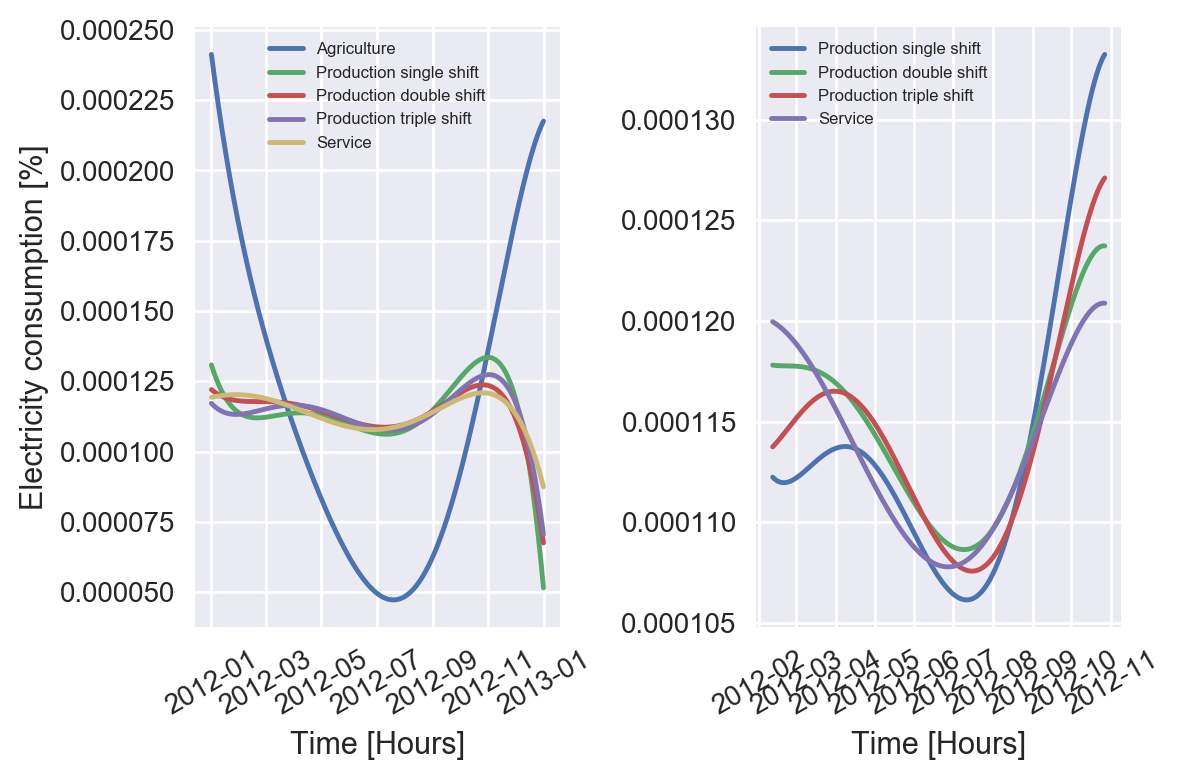

In [505]:
# Second solution (TWO PICTURES)
x = millisecond_index

trend_agri = np.polyfit(x, avg_prof_perc.Agriculture, 15)
trend_single = np.polyfit(x, avg_prof_perc.Production_single, 15)
trend_double = np.polyfit(x, avg_prof_perc.Production_double, 15)
trend_triple = np.polyfit(x, avg_prof_perc.Production_triple, 15)
trend_serv = np.polyfit(x, avg_prof_perc.Service, 15)

p_agri = np.poly1d(trend_agri)
p_single = np.poly1d(trend_single)
p_double = np.poly1d(trend_double)
p_triple = np.poly1d(trend_triple)
p_serv = np.poly1d(trend_serv)

fig10 = plt.figure(10, figsize=(6, 4), dpi=200)
plt.subplot(121)

xax = avg_prof_perc.index
pylab.plot(xax, p_agri(x), label='Agriculture')
pylab.plot(xax, p_single(x), label='Production single shift')
pylab.plot(xax, p_double(x), label='Production double shift')
pylab.plot(xax, p_triple(x), label='Production triple shift')
pylab.plot(xax, p_serv(x), label='Service')

plt.xlabel('Time [Hours]')
plt.ylabel(u'Electricity consumption [%]')
plt.xticks(rotation=30)
plt.legend(loc='best',prop={'size':6})

plt.subplot(122)

xax = avg_prof_perc.index[1000:7200]

pylab.plot(xax, p_single(x[1000:7200]), label='Production single shift')
pylab.plot(xax, p_double(x[1000:7200]), label='Production double shift')
pylab.plot(xax, p_triple(x[1000:7200]), label='Production triple shift')
pylab.plot(xax, p_serv(x[1000:7200]), label='Service')
plt.xlabel('Time [Hours]')

plt.legend(loc='best',prop={'size':6})
plt.xticks(rotation=30)
plt.tight_layout()


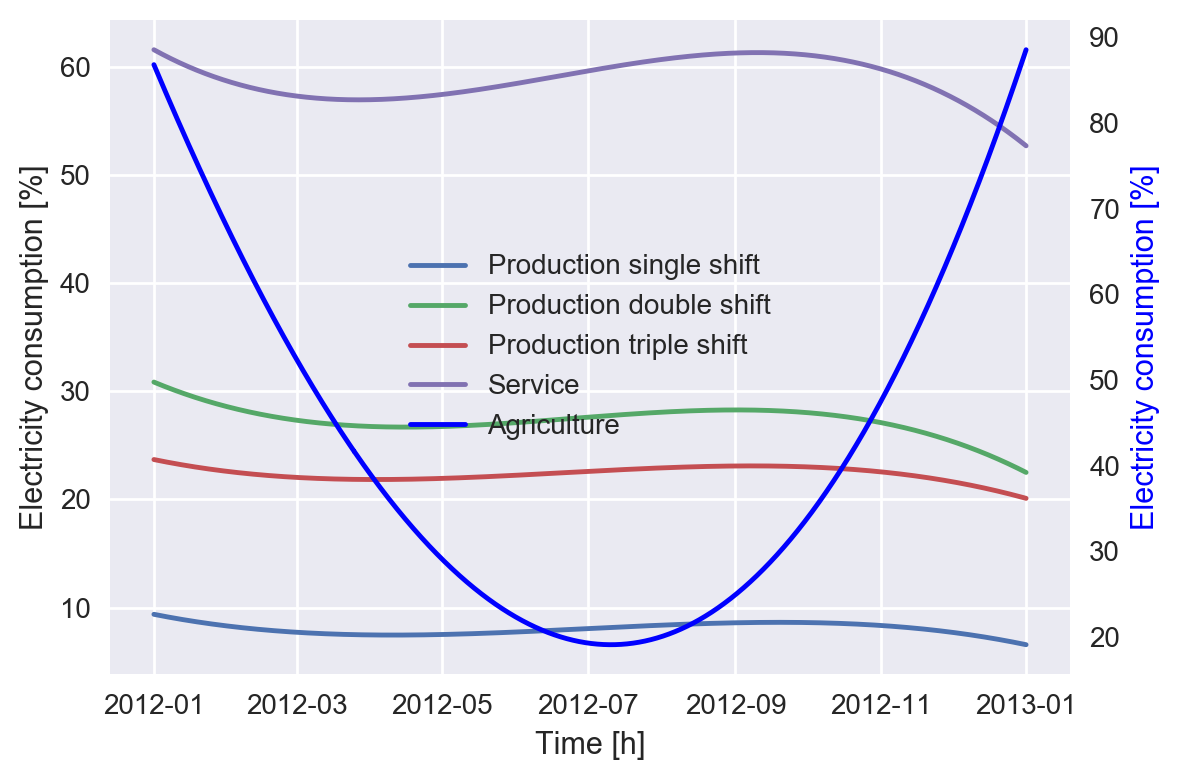

In [440]:
# third solution (AGRICULTURE ON THE SECOND AXES)
# Shift Agriculture in the second axis, adjust lcoation of the legend and remove the background grid
# PERFECT PLOT
figbox = plt.figure(10, figsize=(6, 4), dpi=200)
x = millisecond_index

trend_agri = np.polyfit(x, avg_prof.Agriculture, 3)
trend_single = np.polyfit(x, avg_prof.Production_single, 3)
trend_double = np.polyfit(x, avg_prof.Production_double, 3)
trend_triple = np.polyfit(x, avg_prof.Production_triple, 3)
trend_serv = np.polyfit(x, avg_prof.Service, 3)

p_agri = np.poly1d(trend_agri)
p_single = np.poly1d(trend_single)
p_double = np.poly1d(trend_double)
p_triple = np.poly1d(trend_triple)
p_serv = np.poly1d(trend_serv)


fig, ax1 = plt.subplots(figsize=(6, 4), dpi=200)

xax = avg_prof.index
ax2 = ax1.twinx()
lns1 = ax1.plot(xax, p_single(x), label='Production single shift')
lns2 = ax1.plot(xax, p_double(x), label='Production double shift')
lns3 = ax1.plot(xax, p_triple(x), label='Production triple shift')
lns4 = ax1.plot(xax, p_serv(x), label='Service')
lns5 = ax2.plot(xax, p_agri(x),'b-', label='Agriculture')

lns = lns1+lns2+lns3+lns4+lns5
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc="center")

ax1.set_xlabel('Time [h]')
ax1.set_ylabel('Electricity consumption [%]')
ax2.set_ylabel('Electricity consumption [%]', color='b')
plt.grid(False)
plt.tight_layout()


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


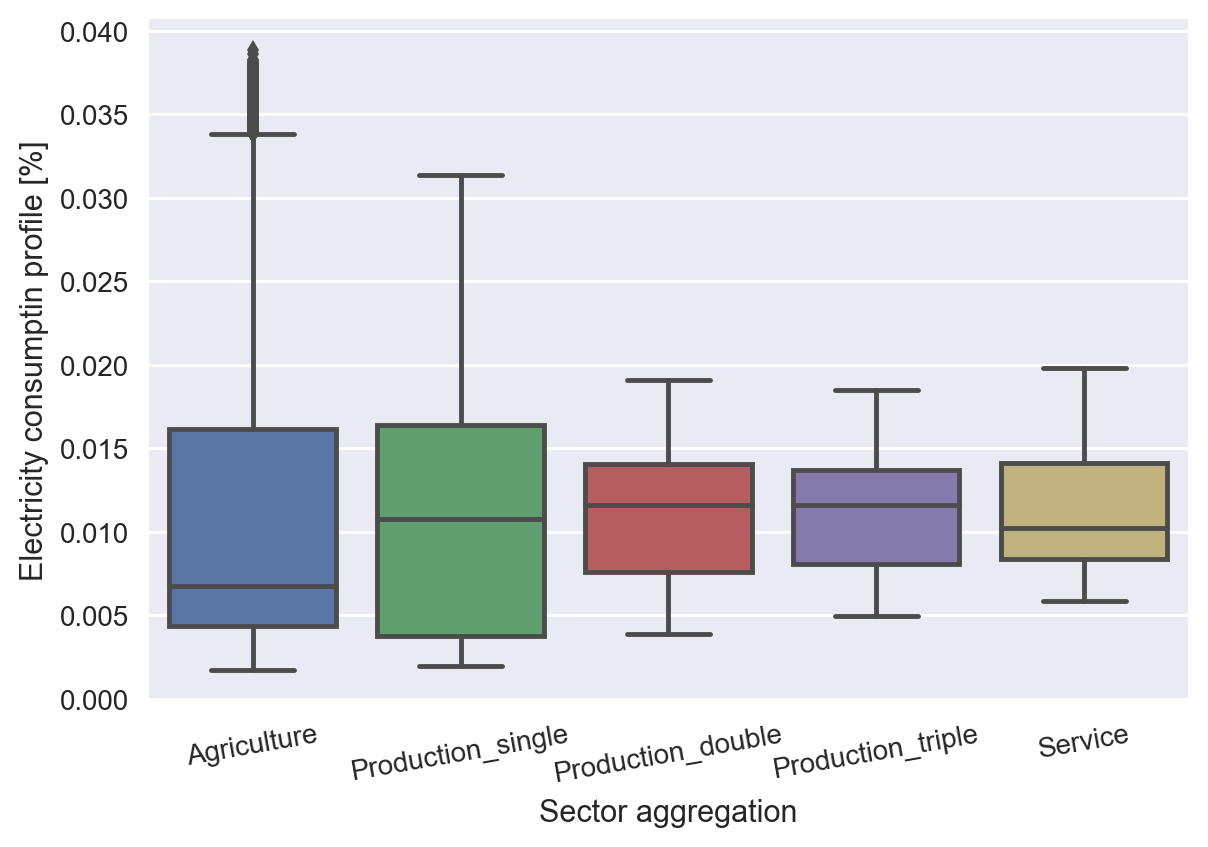

In [28]:
# Plot of the averages
figbox = plt.figure(10, figsize=(6, 4), dpi=200)
sns.boxplot(avg_prof_perc)
#plt.xticks(rotation=70)
plt.tight_layout()
plt.xlabel("Sector aggregation")
plt.ylabel("Electricity consumptin profile [%]")
plt.xticks(rotation=10)
plt.savefig('pics/boxplots.pdf', bbox_inches='tight')

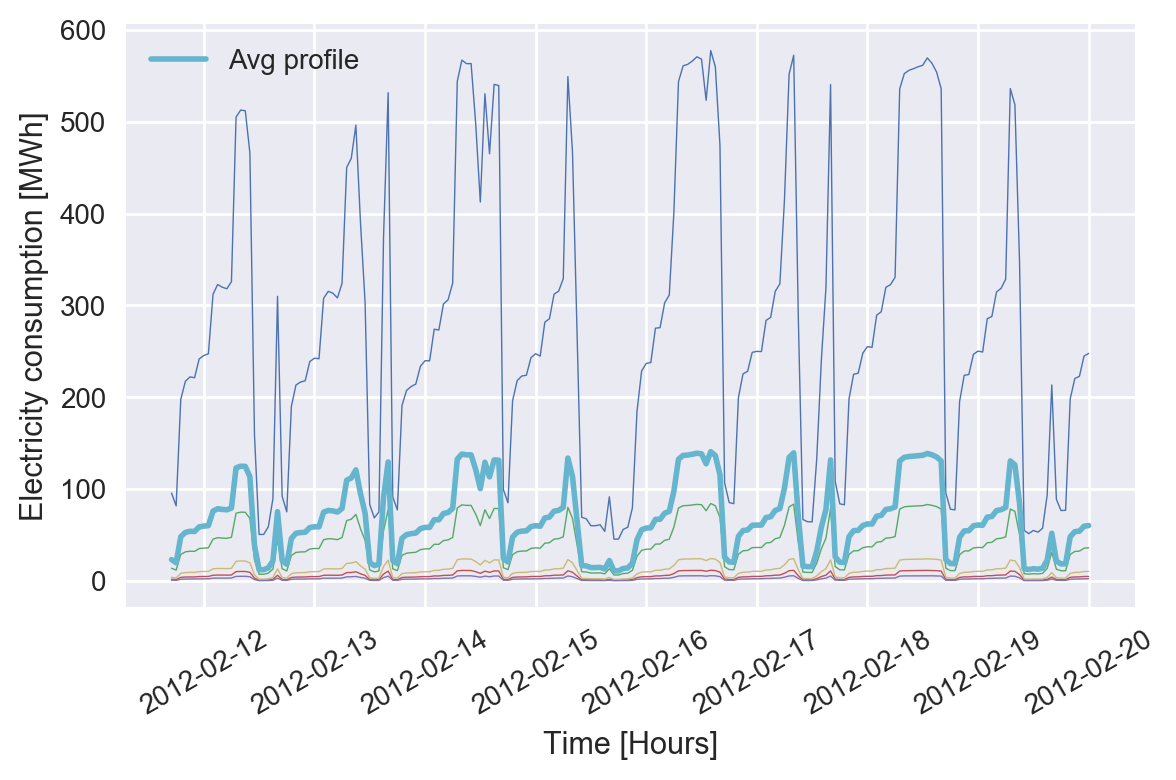

In [478]:
# Compare average profiles against the single profiles for each main industry group

# Agriculture
fig = plt.figure(10, figsize=(6, 4), dpi=200)
plt.plot(agri_dataframe[1000:1200], linewidth=0.5)
plt.plot(avg_prof["Agriculture"][1000:1200], linewidth=2.0, label="Avg profile")
plt.xlabel('Time [Hours]')
plt.ylabel('Electricity consumption [MWh]')
plt.xticks(rotation=30)
plt.legend()
plt.tight_layout()
plt.show()

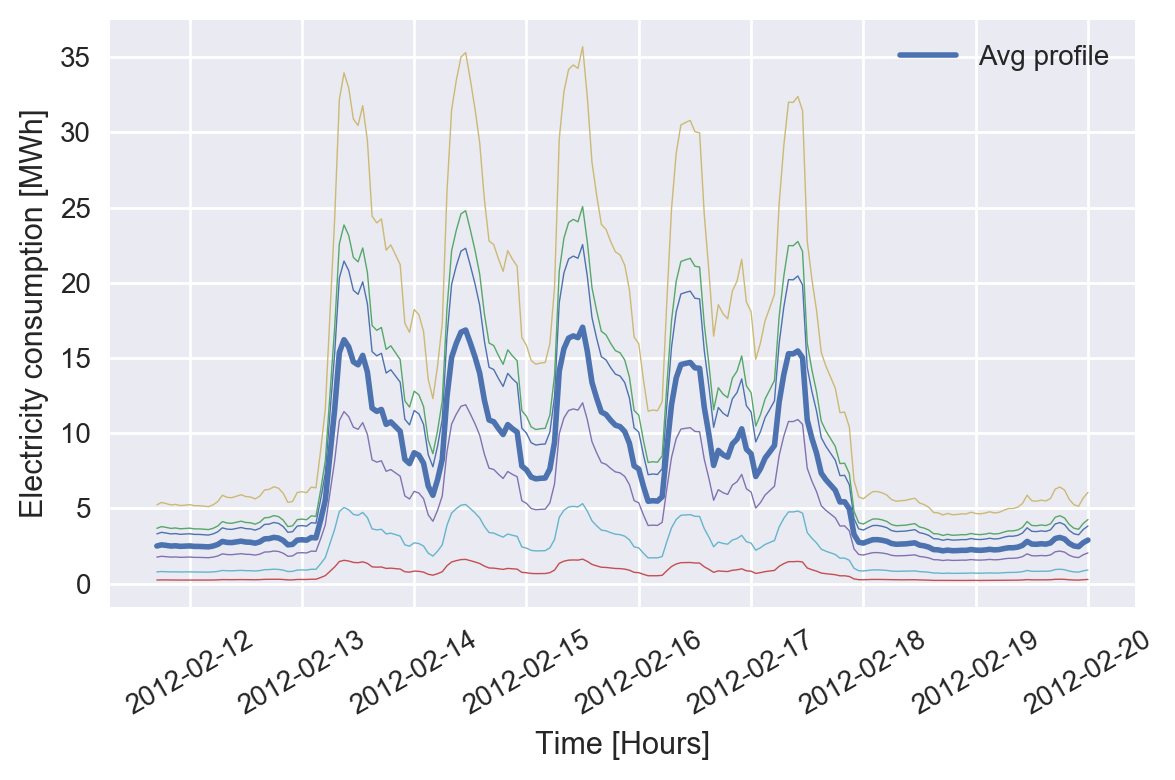

In [479]:
# Production Single shift
fig = plt.figure(10, figsize=(6, 4), dpi=200)

plt.plot(prodsing_dataframe[1000:1200], linewidth=0.5)
plt.plot(avg_prof["Production_single"][1000:1200], linewidth=2, label="Avg profile")
plt.xlabel('Time [Hours]')
plt.ylabel('Electricity consumption [MWh]')
plt.xticks(rotation=30)
plt.legend()
plt.tight_layout()
plt.show()

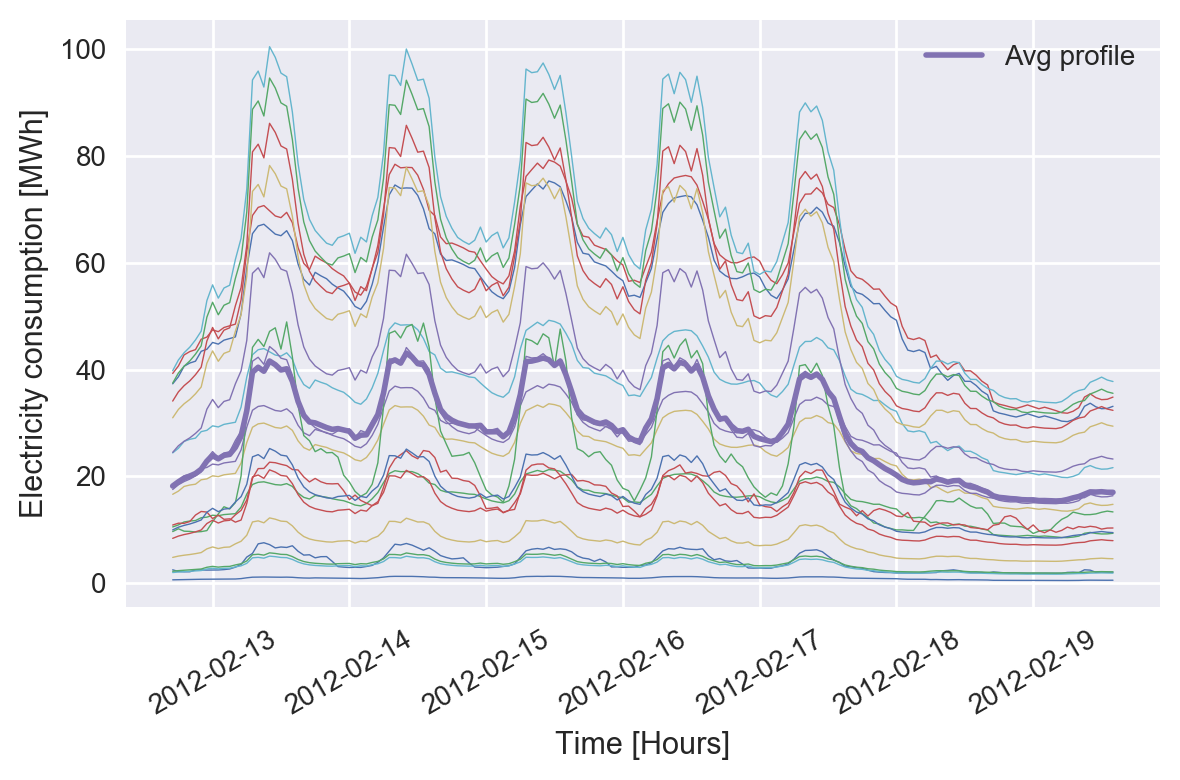

In [494]:
# Production Double shift
fig = plt.figure(1, figsize=(6, 4), dpi=200)

plt.plot(proddoub_dataframe[1024:1190], linewidth=0.5)
plt.plot(avg_prof["Production_double"][1024:1190], linewidth=2.0, label="Avg profile")
plt.xlabel('Time [Hours]')
plt.ylabel('Electricity consumption [MWh]')
plt.xticks(rotation=30)
plt.legend(loc="best")
plt.tight_layout()
#plt.show()
plt.savefig('pics/double.pdf', bbox_inches='tight')

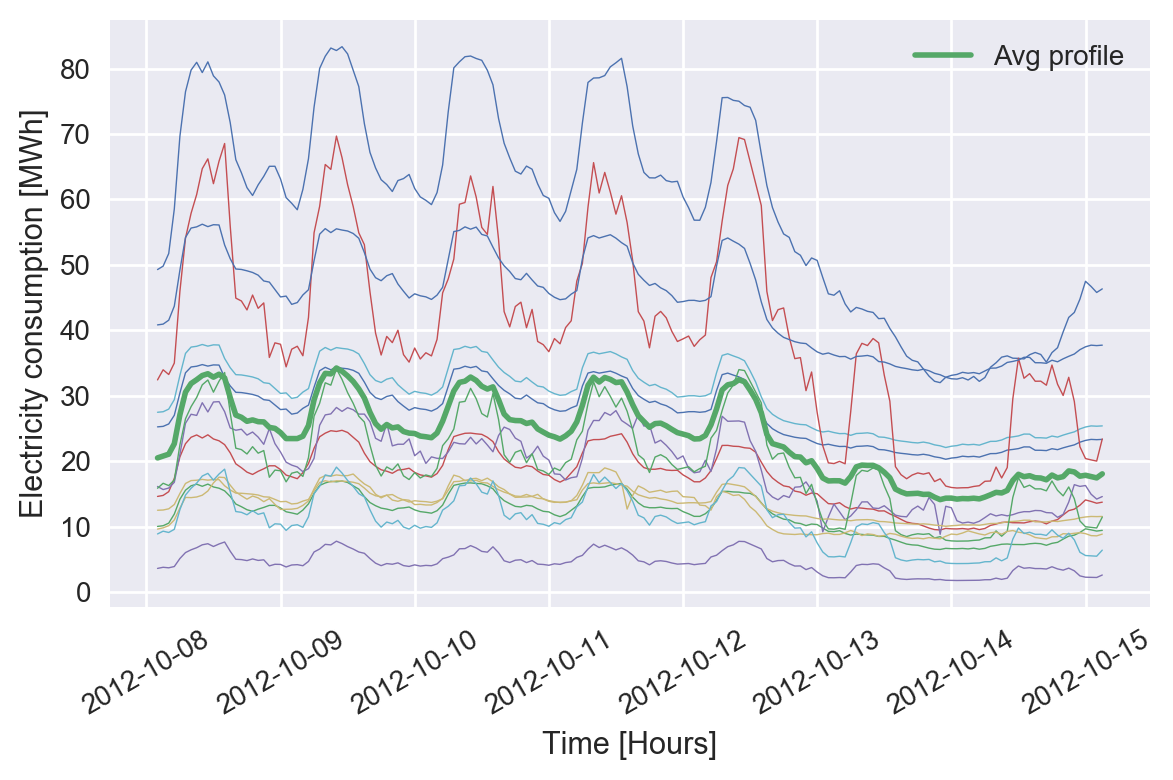

In [482]:
# Production Triple shift
fig = plt.figure(1, figsize=(6, 4), dpi=200)

plt.plot(prodtripl_dataframe[6745:6915], linewidth=0.5)
plt.plot(avg_prof["Production_triple"][6745:6915], linewidth=2.0, label="Avg profile")
plt.xlabel('Time [Hours]')
plt.ylabel('Electricity consumption [MWh]')
plt.xticks(rotation=30)
plt.legend()
plt.tight_layout()
plt.show()

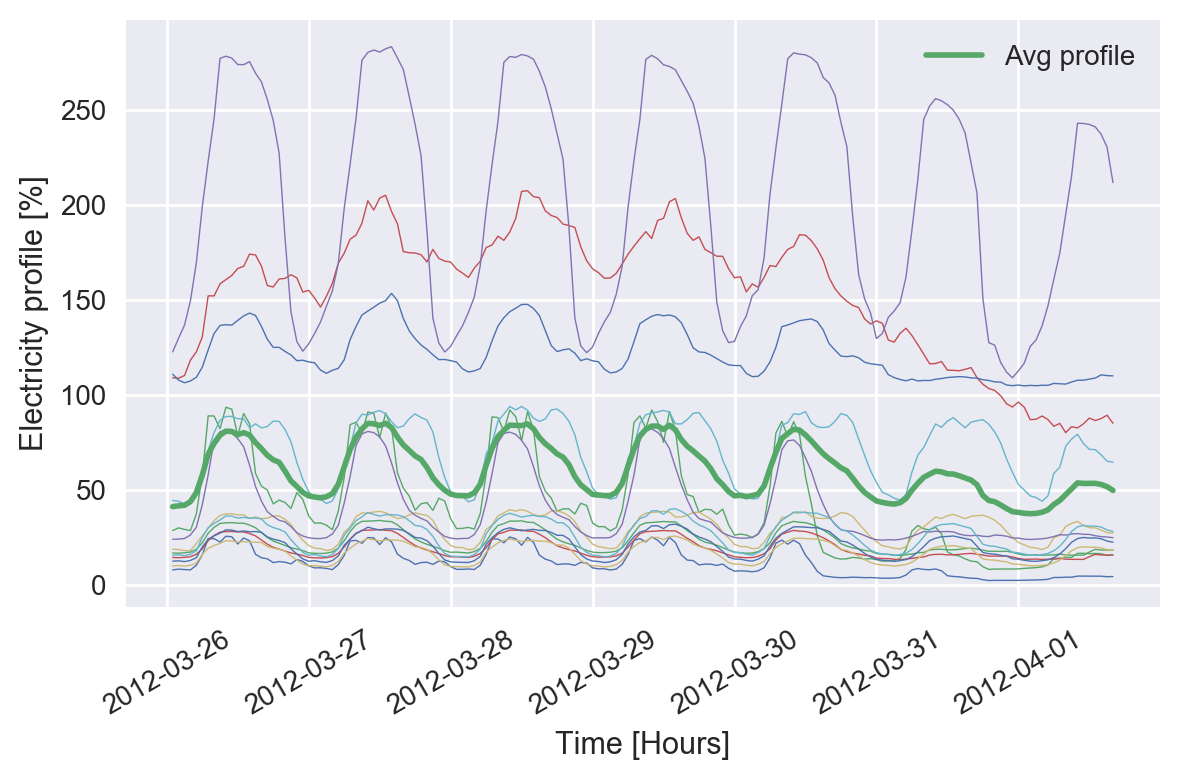

In [483]:
# Service
fig = plt.figure(1, figsize=(6, 4), dpi=200)

plt.plot(serv_dataframe[2040:2200], linewidth=0.5)
plt.plot(avg_prof["Service"][2040:2200], linewidth=2.0, label="Avg profile")
plt.xlabel('Time [Hours]')
plt.ylabel('Electricity profile [%]')
plt.xticks(rotation=30)
plt.tight_layout()
plt.legend(loc="best")
#plt.show()
#plt.savefig('pics/serv.pdf', bbox_inches='tight')


In [ ]:
# Plot of average profiles



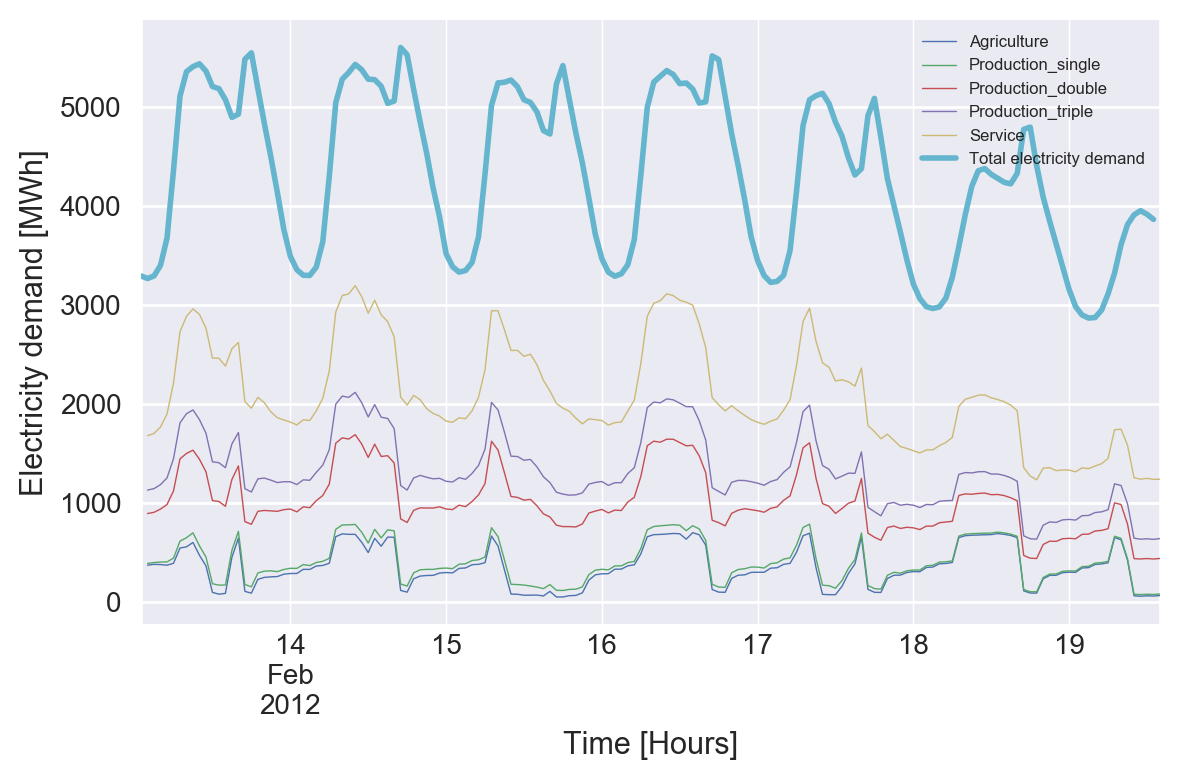

In [489]:
# Plot the industrial electricity consumption compared to the total electricity consumption
# SUM FOR EACH SECTOR

# Winter [1033:1203]
# Spring [2040:2208]
# Summer [4730:4900]
# Autumn [6745:6915]

fig = plt.figure(10, figsize=(6, 4), dpi=200)
xax = new_cumulated[1033:1190].index
#plt.plot(new_cumulated[1033:1190], linewidth=0.5, label=(g for g in new_cumulated.columns.values))
ax1 = new_cumulated[1033:1190].plot(linewidth=0.5, ax = plt.gca())
ax2 = demandel.DK[1033:1190].plot(linewidth=2.0, label="Total electricity demand")

ax1.xaxis.grid(True, which='minor', linestyle='-', linewidth=0.5)
ax1.yaxis.grid(True, which='minor', linestyle='-', linewidth=0.5)
plt.xlabel('Time [Hours]')
plt.ylabel('Electricity demand [MWh]')
plt.tight_layout()
plt.legend(loc='best',prop={'size':6})

plt.savefig('pics/totVssing_aggre.pdf', bbox_inches='tight')


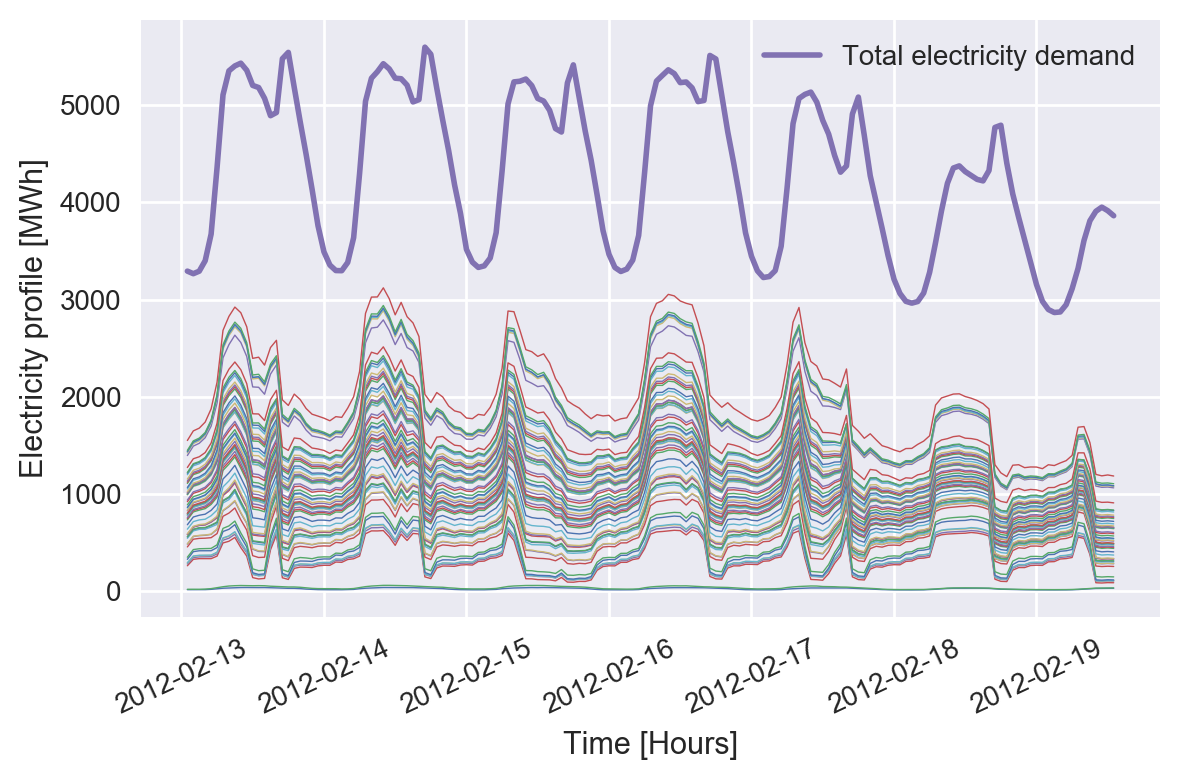

In [487]:
# Plot the industrial electricity consumption compared to the total electricity consumption
# CUMULATED SUM OF EACH SECTOR
# Winter [1033:1203]
# Spring [2040:2208]
# Summer [4730:4900]
# Autumn [6745:6915]


fig = plt.figure(10, figsize=(6, 4), dpi=200)
plt.plot(MWh_cumulated[1033:1190], linewidth=0.5) #label="Cumulated industry electricity demand")
plt.plot(demandel.DK[1033:1190], linewidth=2.0, label="Total electricity demand")

plt.xlabel('Time [Hours]')
plt.ylabel('Electricity profile [MWh]')
plt.xticks(rotation=25)
plt.tight_layout()
plt.legend()

#plt.savefig('pics/totVssing.pdf', bbox_inches='tight')

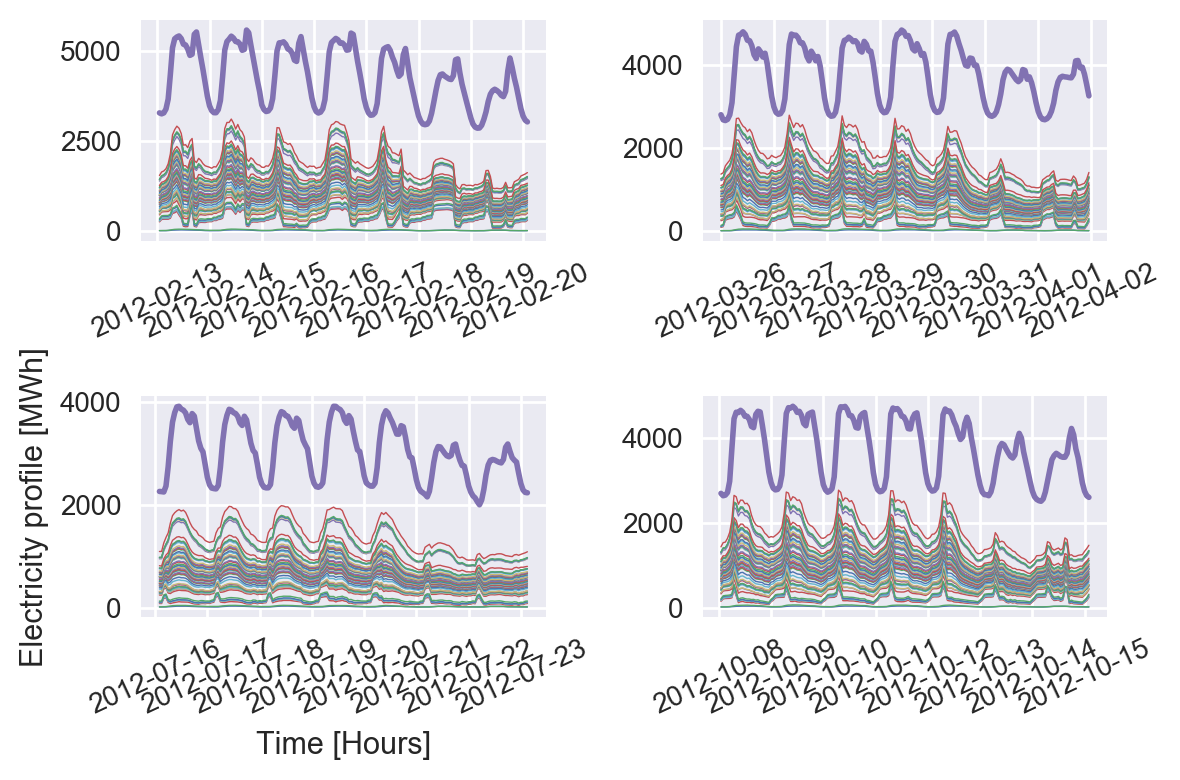

In [488]:
# Plot the industrial electricity consumption compared to the total electricity consumption
# 4 SEASONS
# Winter [1033:1203]
# Spring [2040:2208]
# Summer [4730:4900]
# Autumn [6745:6915]


fig = plt.figure(11, figsize=(6, 4), dpi=200)
plt.subplot(221)
plt.plot(MWh_cumulated[1033:1203], linewidth=0.5) #label="Cumulated industry electricity demand")
plt.plot(demandel.DK[1033:1203], linewidth=2.0, label="Total electricity demand")

plt.xticks(rotation=25)

#plt.legend()

plt.subplot(222)
plt.plot(MWh_cumulated[2040:2208], linewidth=0.5) #label="Cumulated industry electricity demand")
plt.plot(demandel.DK[2040:2208], linewidth=2.0, label="Total electricity demand")
plt.xticks(rotation=25)

plt.subplot(223)
plt.plot(MWh_cumulated[4730:4900], linewidth=0.5) #label="Cumulated industry electricity demand")
plt.plot(demandel.DK[4730:4900], linewidth=2.0, label="Total electricity demand")
plt.xlabel('Time [Hours]')
plt.ylabel('Electricity profile [MWh]')
plt.xticks(rotation=25)

plt.subplot(224)
plt.plot(MWh_cumulated[6745:6915], linewidth=0.5) #label="Cumulated industry electricity demand")
plt.plot(demandel.DK[6745:6915], linewidth=2.0, label="Total electricity demand")
plt.xticks(rotation=25)
plt.tight_layout()
